In [157]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Connecting to the dataset
con = sqlite3.connect('database.sqlite')

In [39]:
query = """
   SELECT r.reviewid, 
          title, 
          artist, 
          year, 
          score, 
          best_new_music, 
          pub_date, 
          pub_year, 
          genre, 
          label
     FROM reviews r
LEFT JOIN genres g  
       ON r.reviewid = g.reviewid
LEFT JOIN labels l 
       ON r.reviewid = l.reviewid
LEFT JOIN years y 
       ON r.reviewid = y.reviewid
       """

df = pd.read_sql_query(query, con)

In [40]:
df.head()

,reviewid,title,artist,year,score,best_new_music,pub_date,pub_year,genre,label
0,22703,mezzanine,massive attack,1998.0,9.3,0,2017-01-08,2017,electronic,virgin
1,22721,prelapsarian,krallice,2016.0,7.9,0,2017-01-07,2017,metal,hathenter
2,22659,all of them naturals,uranium club,2016.0,7.3,0,2017-01-07,2017,rock,fashionable idiots
3,22659,all of them naturals,uranium club,2016.0,7.3,0,2017-01-07,2017,rock,static shock
4,22661,first songs,"kleenex, liliput",2016.0,9.0,1,2017-01-06,2017,rock,kill rock stars


In [192]:
df.to_csv('raw_data.csv', index=False)

In [164]:
#Seems like we can get rid of 2017 since it has a very little number of reviews
df.pub_year.value_counts()

2006    1817
2007    1798
2008    1760
2011    1729
2010    1695
2005    1693
2016    1654
2009    1636
2004    1621
2012    1620
2013    1612
2014    1611
2003    1506
2015    1369
2002    1299
2001     638
2000     500
1999     344
2017      20
Name: pub_year, dtype: int64

In [165]:
df_genre_year = (
    df[(df.pub_year < 2017)] #removing 2017 only has 20 reviews
    .groupby(['pub_year','genre'])
    .agg({'score':'mean', 'reviewid':'count', 'best_new_music':'mean'})
    .reset_index()
    .sort_values(by=['pub_year','genre'])
)

df_genre_year.head()

,pub_year,genre,score,reviewid,best_new_music
0,1999,electronic,6.850000,94,0.0
1,1999,experimental,6.584375,32,0.0
2,1999,folk/country,7.766667,6,0.0
3,1999,global,8.433333,3,0.0
4,1999,jazz,7.558333,12,0.0


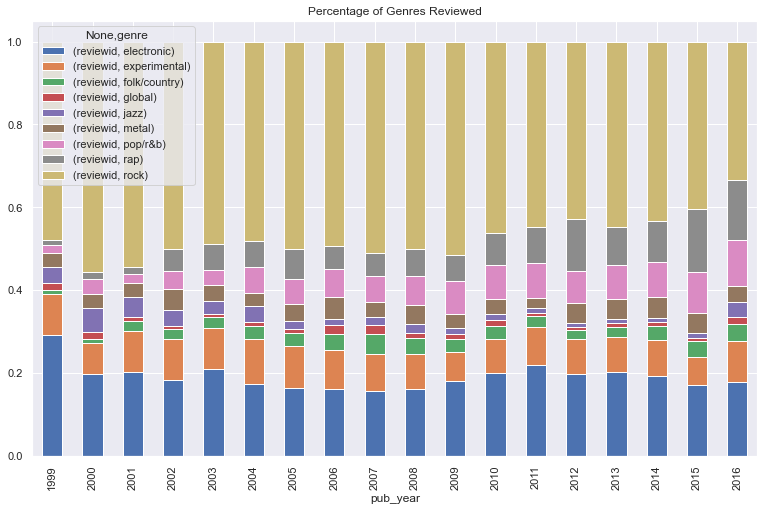

In [191]:
#Getting reviews of percentages broken down by year
tps = (
    df[df.pub_year < 2017]
    .sort_values(by=['pub_year', 'reviewid'], ascending=False)
    .pivot_table(values=['reviewid'], index='pub_year',columns='genre',aggfunc='sum')
)

tps = tps.div(tps.sum(1), axis=0)

tps.plot(kind='bar', stacked=True, title='Percentage of Genres Reviewed');

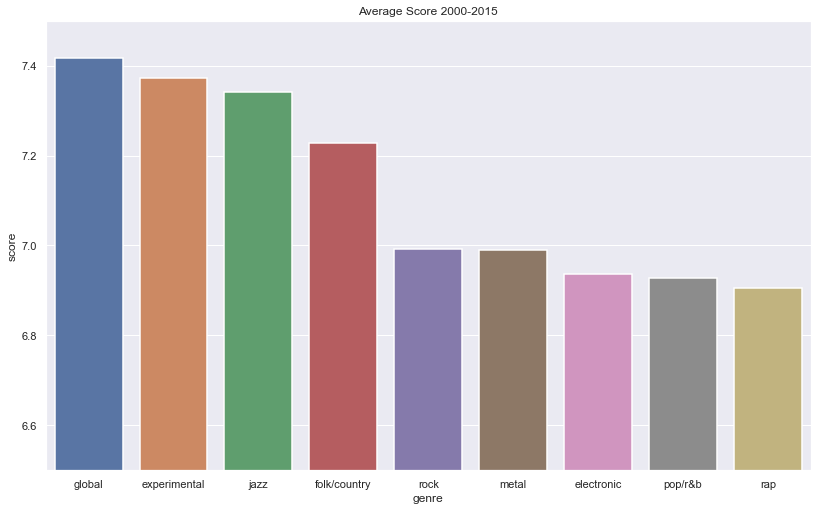

In [173]:
#Average score by genre
sns.barplot(
    data=df.groupby('genre')['score'].mean().reset_index().sort_values(by='score', ascending=False), 
    x='genre', 
    y='score', 
    linewidth=1.5,
).set_title('Average Score 1999-2016')

plt.ylim(6.5,7.5)

sns.set(rc={'figure.figsize':(13,8)});

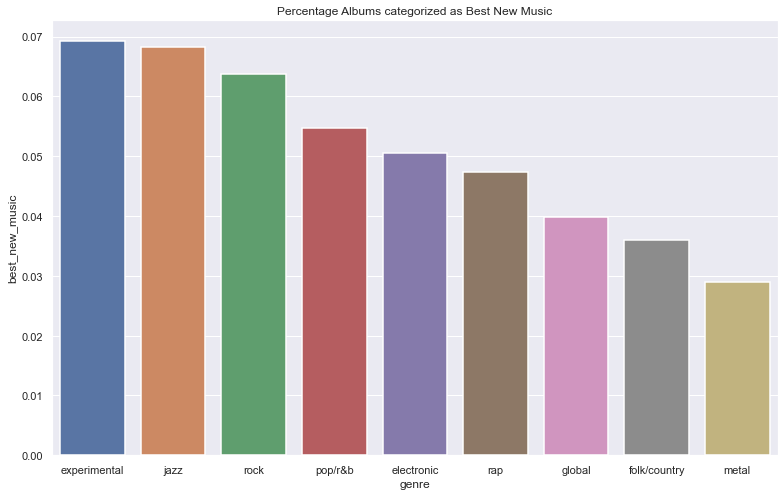

In [174]:
#Percentage of albums categorized as best new music
sns.barplot(
    data=df_genre_year.groupby('genre')['best_new_music'].mean().reset_index().sort_values(by='best_new_music', ascending=False), 
    x='genre', 
    y='best_new_music', 
    linewidth=1.5,
).set_title('Percentage Albums categorized as Best New Music')

sns.set(rc={'figure.figsize':(13,8)});